In [1]:
# packages
import os
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False
from hsfs import StarkMatrix, En_h, h, c

In [2]:
# construct matrices
nmin = 34
nmax = 38
S = 1
# specify the electric field
field = np.linspace(0, 0.1, 201) # V /cm
# calculate stark maps
stark_matrices = []
stark_maps = []
for i, MJ in enumerate([0, 1, 2]):
    # specify basis
    mat = StarkMatrix(nmin, nmax, S, MJ)
    stark_matrices.append(mat)
    print("MJ = %d. Number of basis states = %d."%(MJ, mat.num_states))
    sm = mat.stark_map(field * 100)
    # diagonalise for each field
    stark_maps.append(sm)

MJ = 0. Number of basis states = 530.


diagonalise Hamiltonian: 100%|███████████████████████████████████████████████████████| 201/201 [00:06<00:00, 31.47it/s]


MJ = 1. Number of basis states = 525.


diagonalise Hamiltonian: 100%|███████████████████████████████████████████████████████| 201/201 [00:06<00:00, 33.50it/s]


MJ = 2. Number of basis states = 510.


diagonalise Hamiltonian: 100%|███████████████████████████████████████████████████████| 201/201 [00:07<00:00, 28.19it/s]


## $1s36s \, ^3\rm{S}_1$

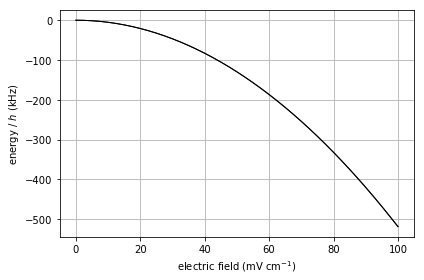

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))

# y-offset, P_2 level
mat = stark_matrices[0]
ix_s1 = reduce(np.intersect1d, (mat.where('n', 36),
                                mat.where('L', 0),
                                mat.where('J', 1)))[0]
yoffset = mat.basis[ix_s1].E0 * En_h

# plot
for mat, sm in zip(stark_matrices, stark_maps):
    indexs = np.intersect1d(mat.where('n', 36), mat.where('L', 0))
    for ix in indexs:
        ax.plot(1e3*field, 1e-3*(sm[:, ix] - yoffset) / h, ls='-', lw=1, c='k')

# format
ax.set_xlabel('electric field (mV cm$^{-1}$)')
ax.set_ylabel('energy / $h$ (kHz)')
ax.grid()

# output
plt.tight_layout()
fileout = os.path.join("..", "images", "stark_36s.png")
plt.savefig(fileout, dpi=200)
plt.show()

## $1s36p \, ^3\rm{P}_J$

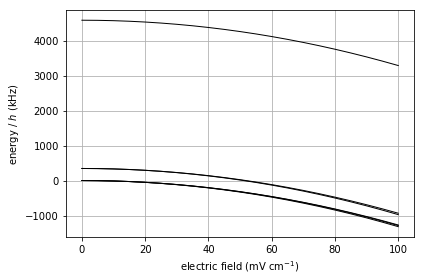

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))

# y-offset, P_2 level
mat = stark_matrices[0]
ix_p2 = reduce(np.intersect1d, (mat.where('n', 36),
                                mat.where('L', 1),
                                mat.where('J', 2)))[0]
yoffset = mat.basis[ix_p2].E0 * En_h

# plot
for mat, sm in zip(stark_matrices, stark_maps):
    indexs = np.intersect1d(mat.where('n', 36), mat.where('L', 1))
    for ix in indexs:
        ax.plot(1e3*field, 1e-3*(sm[:, ix] - yoffset) / h, ls='-', lw=1, c='k')

# format
ax.set_xlabel('electric field (mV cm$^{-1}$)')
ax.set_ylabel('energy / $h$ (kHz)')
ax.grid()

# output
plt.tight_layout()
fileout = os.path.join("..", "images", "stark_36p.png")
plt.savefig(fileout, dpi=200)
plt.show()

## $1s36s \, ^3\rm{S}_1$ $ \rightarrow 1s36p \, ^3\rm{P}_J$

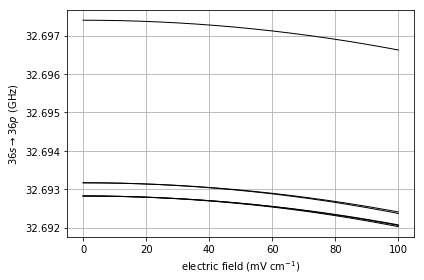

In [5]:
# L=0, MJ=0
mat = stark_matrices[0]
sm = stark_maps[0]
ix_s0 = reduce(np.intersect1d, (mat.where('n', 36),
                                mat.where('L', 0),
                                mat.where('J', 1)))
en_s0 = sm[:, ix_s0[0]]

# plot 
fig, ax = plt.subplots(figsize=(6, 4))

# loop over MJ maps
for mat, sm in zip(stark_matrices, stark_maps):
    indexs = np.intersect1d(mat.where('n', 36), mat.where('L', 1))
    for ix in indexs:
        nu = (sm[:, ix] - en_s0) / h
        ax.plot(1e3*field, 1e-9 * nu, c='k', ls='-', lw=1)
        
# format
ax.set_xlabel('electric field (mV cm$^{-1}$)')
ax.set_ylabel(r'$36s \rightarrow 36p$ (GHz)')
ax.grid()

# output
plt.tight_layout()
fileout = os.path.join("..", "images", "stark_36s_36p.png")
plt.savefig(fileout, dpi=200)
plt.show()

## $1s36p \, ^3\rm{P}_0$ $\rightarrow 1s36p \, ^3\rm{P}_2$

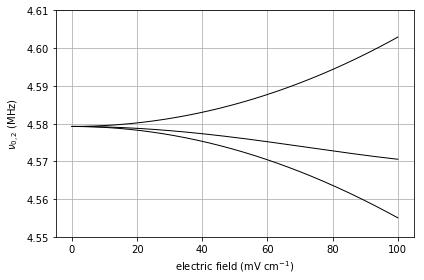

In [6]:
# L=1, J=0, MJ=0
mat = stark_matrices[0]
sm = stark_maps[0]
ix_p00 = reduce(np.intersect1d, (mat.where('n', 36),
                                 mat.where('L', 1),
                                 mat.where('J', 0)))
en_p00 = sm[:, ix_p00[0]]

# plot
fig, ax = plt.subplots(figsize=(6, 4))

# loop over MJ maps
for mat, sm in zip(stark_matrices, stark_maps):
    indexs = np.intersect1d(mat.where('n', 36), mat.where('L', 1))
    for ix in indexs:
        nu = (en_p00 - sm[:, ix] ) / h
        ax.plot(1e3*field, 1e-6 * nu, c='k', ls='-', lw=1)

# format
ax.set_ylim(4.55, 4.61)
ax.set_xlabel('electric field (mV cm$^{-1}$)')
ax.set_ylabel(r'$\nu_{0, 2}$ (MHz)')
ax.grid()

# output
plt.tight_layout()
fileout = os.path.join("..", "images", "stark_36p_nu02.png")
plt.savefig(fileout, dpi=200)
plt.show()

## $1s36p \, ^3\rm{P}_1$ $\rightarrow 1s36p \, ^3\rm{P}_2$

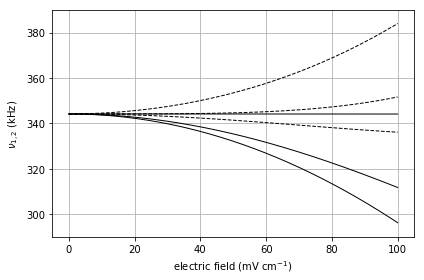

In [7]:
# L=1, J=1, MJ=0
mat = stark_matrices[0]
sm = stark_maps[0]
ix_p10 = reduce(np.intersect1d, (mat.where('n', 36),
                                 mat.where('L', 1),
                                 mat.where('J', 1)))
en_p10 = sm[:, ix_p10[0]]
# L=1, J=1, MJ=1
mat = stark_matrices[1]
sm = stark_maps[1]
ix_p11 = reduce(np.intersect1d, (mat.where('n', 36),
                                 mat.where('L', 1),
                                 mat.where('J', 1)))
en_p11 = sm[:, ix_p11[0]]

# plot
fig, ax = plt.subplots(figsize=(6, 4))

for mat, sm in zip(stark_matrices, stark_maps):
    indexs = np.intersect1d(mat.where('n', 36), mat.where('L', 1))
    for ix in indexs:
        nu = (en_p10 - sm[:, ix]) / h
        ax.plot(1e3*field, 1e-3 * nu, c='k', ls='-', lw=1)
        nu = (en_p11 - sm[:, ix]) / h
        ax.plot(1e3*field, 1e-3 * nu, c='k', ls='--', lw=1)
        
# format
ax.set_ylim(290, 390)
ax.set_xlabel('electric field (mV cm$^{-1}$)')
ax.set_ylabel(r'$\nu_{1, 2}$ (kHz)')
ax.grid()

# output
plt.tight_layout()
fileout = os.path.join("..", "images", "stark_36p_nu12.png")
plt.savefig(fileout, dpi=200)
plt.show()